<a href="https://colab.research.google.com/github/Daniel1020/Nano-Degree-Projects/blob/master/predicting_default_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving credit-data-training (3).xlsx to credit-data-training (3).xlsx
Saving customers-to-score (1).xlsx to customers-to-score (1).xlsx


In [0]:
df_train= pd.read_excel('credit-data-training (3).xlsx')
df_customer=pd.read_excel('customers-to-score (1).xlsx')

In [17]:
df_train.info()
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          156 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

### From above, it's clear that column of 'Duration-in-current-address' contains 344 nulls ,we will remove this field
### also, column'age-years'contains 12 nulls, remove these entries

# preprocessing  feature

In [0]:
df_train = df_train.drop('Duration-in-Current-address',axis=1)
df_train = df_train.dropna(subset=['Age-years'],how='all')

In [0]:
target_name = 'Credit-Application-Result'
numeric_feature = list(df_train.describe().columns)
qualitative_feature = list(df_train.drop(numeric_feature,axis=1).drop(target_name,
                                                                     axis=1).columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


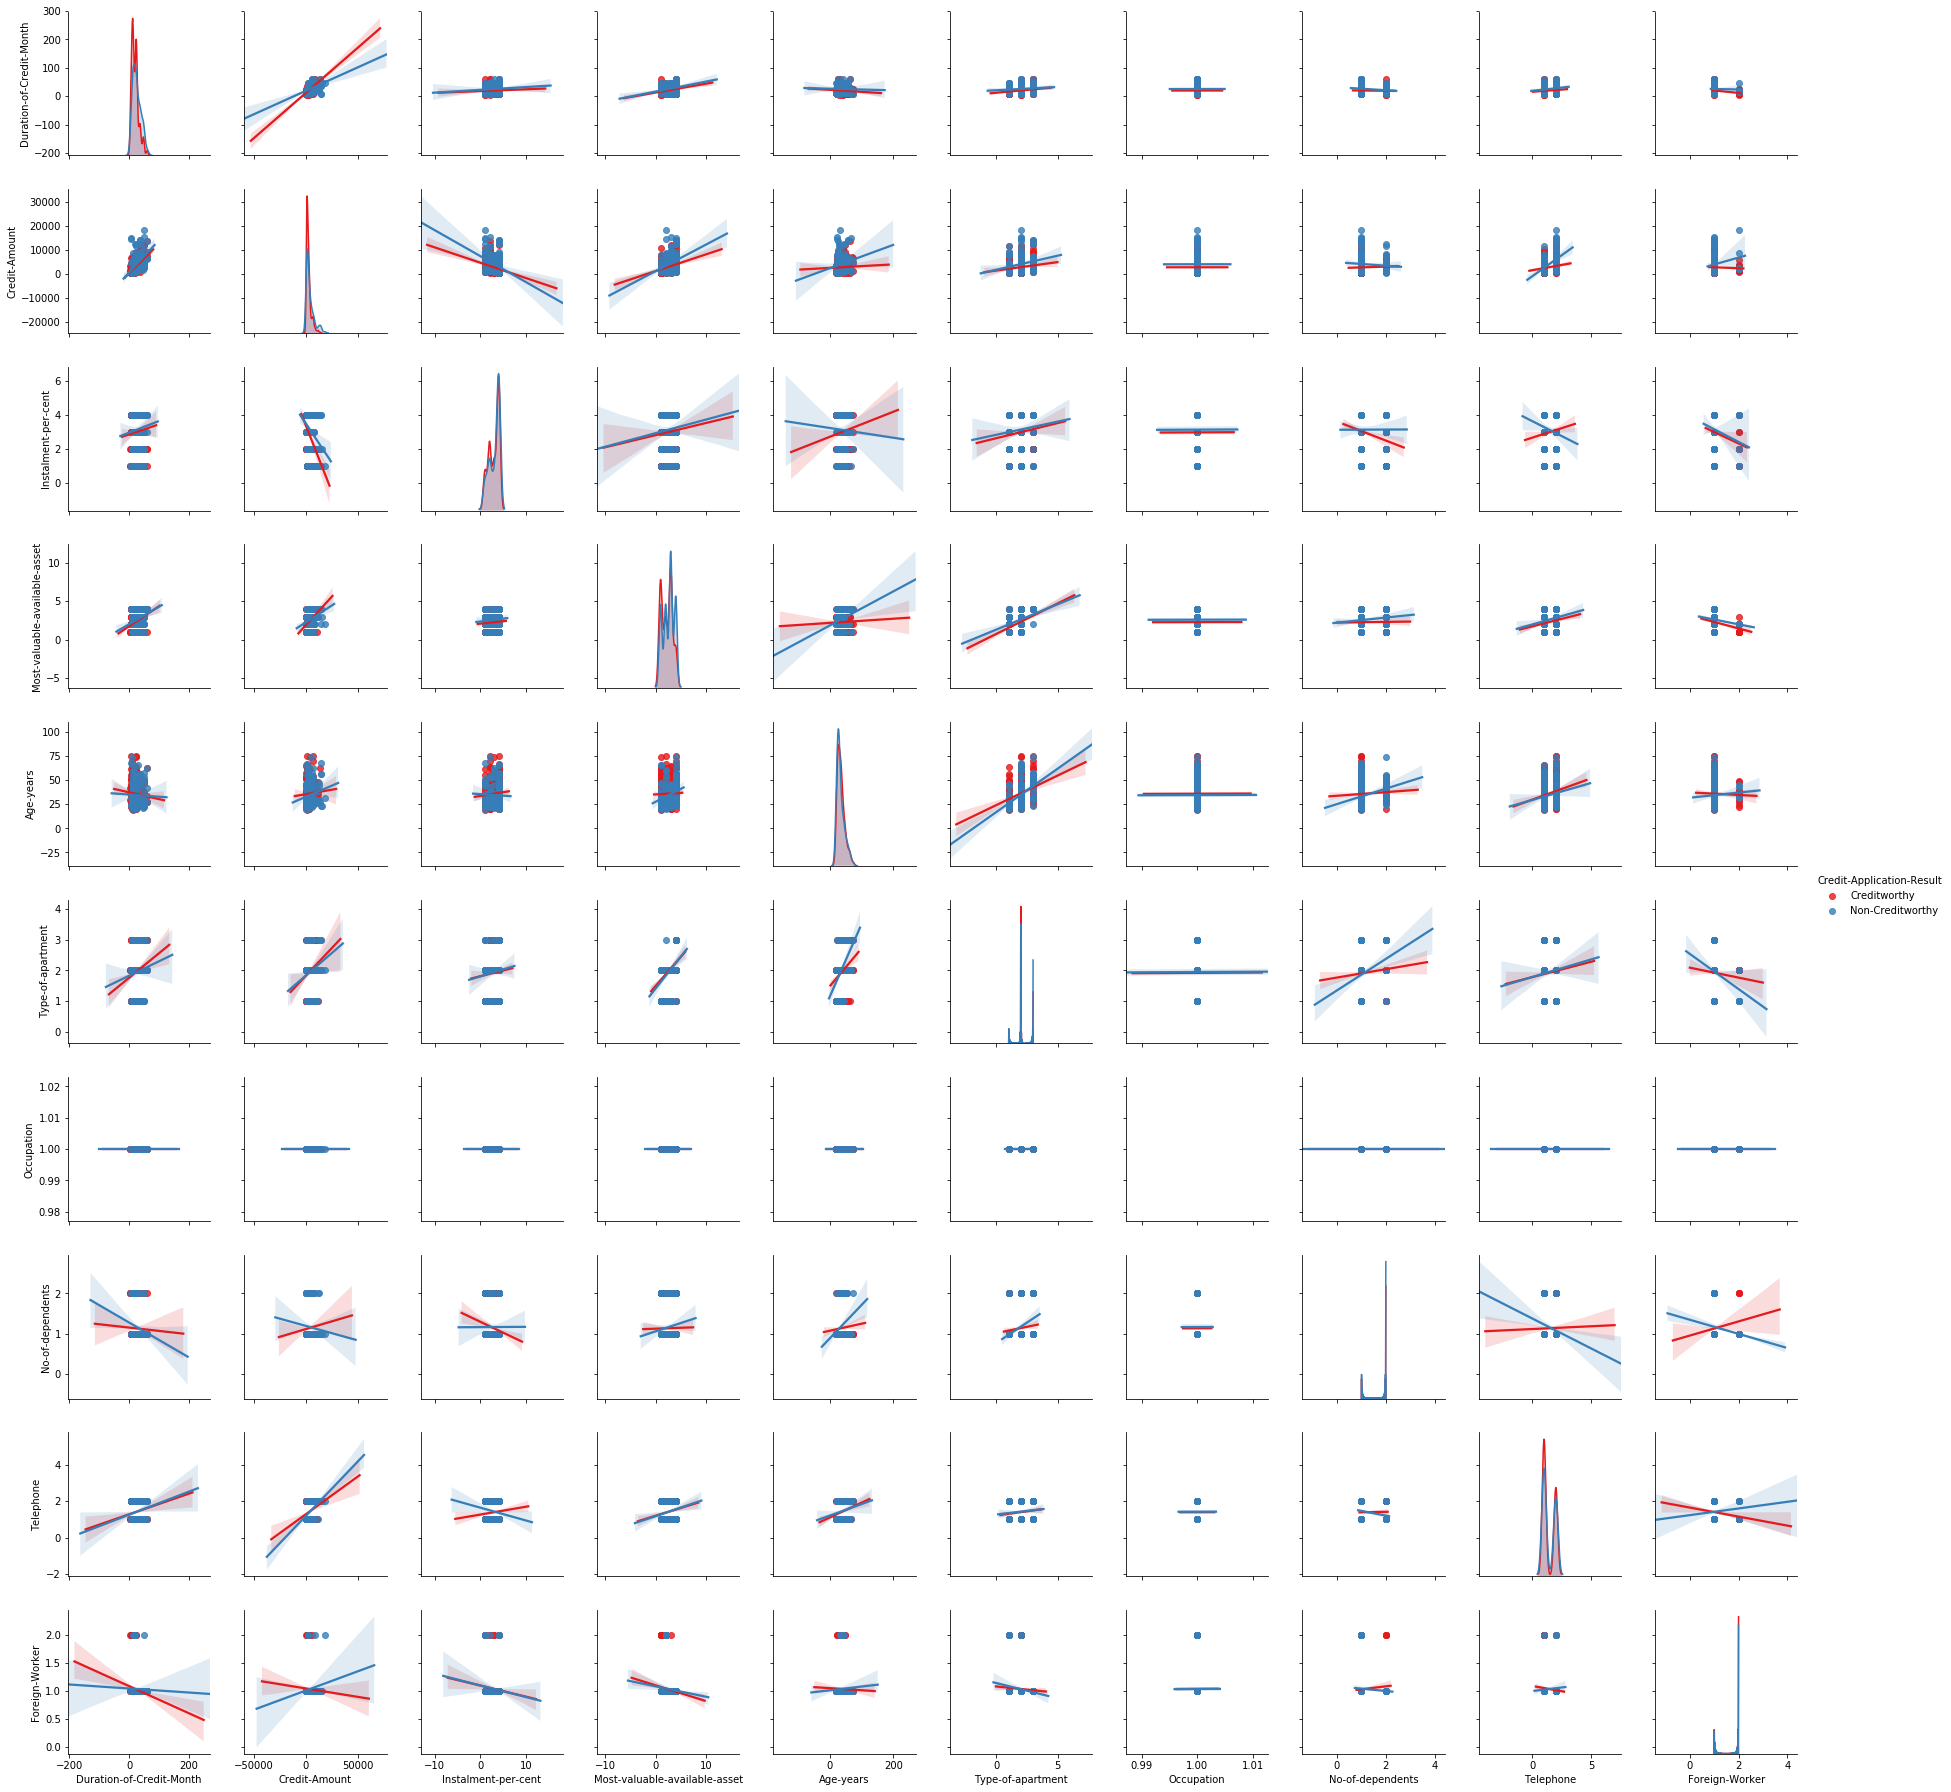

In [28]:
sns.pairplot(df_train, hue=target_name, palette='Set1', kind='reg')

In [27]:
list(df_train.describe().columns)

['Duration-of-Credit-Month',
 'Credit-Amount',
 'Instalment-per-cent',
 'Most-valuable-available-asset',
 'Age-years',
 'Type-of-apartment',
 'Occupation',
 'No-of-dependents',
 'Telephone',
 'Foreign-Worker']

In [0]:
df_train_dummy = pd.get_dummies(df_train).drop(['Credit-Application-Result_Non-Creditworthy'],axis=1)

In [30]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 499
Data columns (total 31 columns):
Duration-of-Credit-Month                                        488 non-null int64
Credit-Amount                                                   488 non-null int64
Instalment-per-cent                                             488 non-null int64
Most-valuable-available-asset                                   488 non-null int64
Age-years                                                       488 non-null float64
Type-of-apartment                                               488 non-null int64
Occupation                                                      488 non-null int64
No-of-dependents                                                488 non-null int64
Telephone                                                       488 non-null int64
Foreign-Worker                                                  488 non-null int64
Credit-Application-Result_Creditworthy                         

In [0]:
from sklearn.feature_selection import SelectKBest

In [0]:
selection = SelectKBest(k=5)


In [33]:
selection.fit(df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1), df_train_dummy['Credit-Application-Result_Creditworthy'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 6 27] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=5, score_func=<function f_classif at 0x7f77f183cb70>)

In [34]:
len(selection.scores_)

30

In [0]:
features = df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1).columns

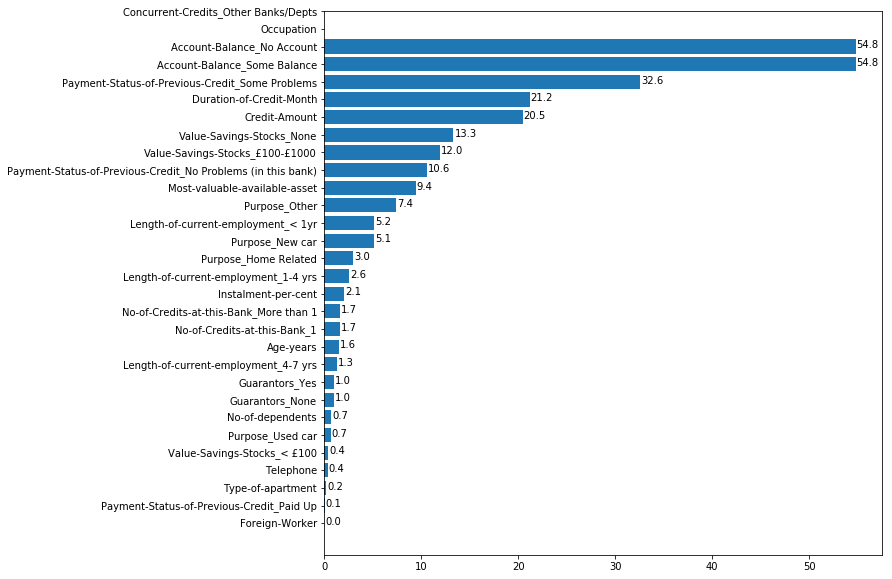

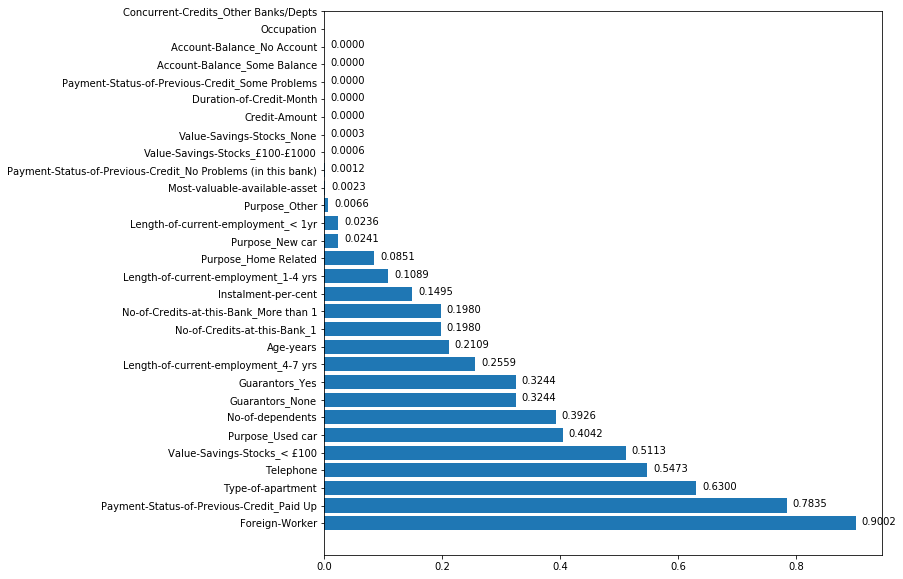

In [36]:

plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30), 
         selection.scores_[selection.scores_.argsort()], 
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.1,
                 y=p.get_y()+.3,
                 s="%0.1f" % p.get_width())
plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30),
         selection.pvalues_[selection.scores_.argsort()],
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.01,
                 y=p.get_y()+.3,
                 s="%0.4f" % p.get_width())

In [37]:

features_by_importance = features[selection.scores_.argsort()[::-1]]
p_values_by_importance = selection.pvalues_[selection.scores_.argsort()[::-1]]
use_features = []
for idx in range(len(features_by_importance)):
    if ~np.isnan(p_values_by_importance[idx]):
        if p_values_by_importance[idx] <= 0.15:
            use_features.append(features_by_importance[idx])
            print(features_by_importance[idx])

Account-Balance_No Account
Account-Balance_Some Balance
Payment-Status-of-Previous-Credit_Some Problems
Duration-of-Credit-Month
Credit-Amount
Value-Savings-Stocks_None
Value-Savings-Stocks_£100-£1000
Payment-Status-of-Previous-Credit_No Problems (in this bank)
Most-valuable-available-asset
Purpose_Other
Length-of-current-employment_< 1yr
Purpose_New car
Purpose_Home Related
Length-of-current-employment_1-4 yrs
Instalment-per-cent


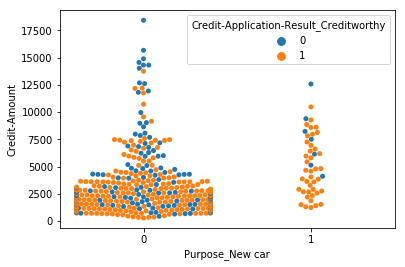

In [38]:

sns.swarmplot(data=df_train_dummy, x='Purpose_New car', y='Credit-Amount', 
          hue='Credit-Application-Result_Creditworthy')

## modeling


In [39]:
df_features = df_train_dummy[use_features]
df_labels = df_train_dummy['Credit-Application-Result_Creditworthy']
df_features.head()

,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Some Problems,Duration-of-Credit-Month,Credit-Amount,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Payment-Status-of-Previous-Credit_No Problems (in this bank),Most-valuable-available-asset,Purpose_Other,Length-of-current-employment_< 1yr,Purpose_New car,Purpose_Home Related,Length-of-current-employment_1-4 yrs,Instalment-per-cent
1,0,1,0,4,1494,0,1,0,1,0,1,0,1,0,1
2,0,1,0,4,1544,1,0,1,1,0,0,0,1,1,2
3,0,1,0,4,3380,1,0,1,1,0,0,0,1,1,1
4,1,0,0,6,343,1,0,0,1,0,1,0,1,0,4
5,0,1,0,6,362,0,0,1,3,0,1,0,1,0,4


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Logistic Regression")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Logistic Regression
---------------------------------
Accuracy:	0.7551
Precision:	0.7623
Recall:		0.9300

              precision    recall  f1-score   support

           0       0.72      0.38      0.50        47
           1       0.76      0.93      0.84       100

    accuracy                           0.76       147
   macro avg       0.74      0.66      0.67       147
weighted avg       0.75      0.76      0.73       147

[[18 29]
 [ 7 93]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7823
Precision:	0.8148
Recall:		0.8800

              precision    recall  f1-score   support

           0       0.69      0.57      0.63        47
           1       0.81      0.88      0.85       100

    accuracy                           0.78       147
   macro avg       0.75      0.73      0.74       147
weighted avg       0.78      0.78      0.78       147

[[27 20]
 [12 88]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Gaussian Naive-Bayes")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Gaussian Naive-Bayes
---------------------------------
Accuracy:	0.7483
Precision:	0.7603
Recall:		0.9200

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        47
           1       0.76      0.92      0.83       100

    accuracy                           0.75       147
   macro avg       0.73      0.65      0.66       147
weighted avg       0.74      0.75      0.72       147

[[18 29]
 [ 8 92]]


In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Decision Tree")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Decision Tree
---------------------------------
Accuracy:	0.6395
Precision:	0.7117
Recall:		0.7900

              precision    recall  f1-score   support

           0       0.42      0.32      0.36        47
           1       0.71      0.79      0.75       100

    accuracy                           0.64       147
   macro avg       0.56      0.55      0.56       147
weighted avg       0.62      0.64      0.62       147

[[15 32]
 [21 79]]


In [47]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7007
Precision:	0.7333
Recall:		0.8800

              precision    recall  f1-score   support

           0       0.56      0.32      0.41        47
           1       0.73      0.88      0.80       100

    accuracy                           0.70       147
   macro avg       0.64      0.60      0.60       147
weighted avg       0.68      0.70      0.67       147

[[15 32]
 [12 88]]


In [48]:

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Support Vector Machine")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Support Vector Machine
---------------------------------
Accuracy:	0.3197
Precision:	0.5000
Recall:		0.0300

              precision    recall  f1-score   support

           0       0.31      0.94      0.47        47
           1       0.50      0.03      0.06       100

    accuracy                           0.32       147
   macro avg       0.41      0.48      0.26       147
weighted avg       0.44      0.32      0.19       147

[[44  3]
 [97  3]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
